In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


data: pd.DataFrame = pd.read_csv('../../data/iris.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

#split data
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

In [95]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prdY = clf.predict(tstX)
cnf_mtx = metrics.confusion_matrix(tstY, prdY, labels)
print(plt.gca, cnf_mtx, labels)

<function gca at 0x000001A889073048> [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]] ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


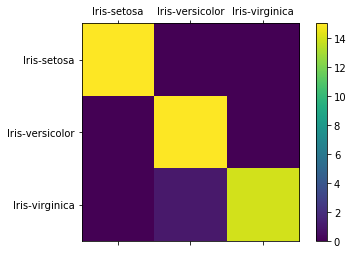

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_mtx, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['','Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.set_yticklabels(['','Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.show()

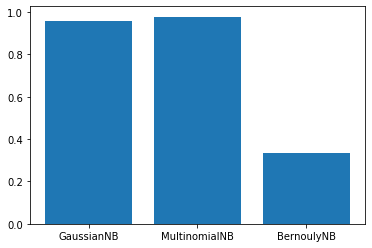

In [97]:
estimators = {'GaussianNB': GaussianNB(), 
              'MultinomialNB': MultinomialNB(), 
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
plt.bar(xvalues, yvalues)
plt.show()

In [98]:
cnf_mtx

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [100]:
data = pd.read_csv('../../data/iris.csv')
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

#split data
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

In [102]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prdY = clf.predict(tstX)
confusion_matrix(tstY,prdY, labels=labels)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [103]:
clf.score(trnX, trnY)

0.9523809523809523

# compute cross validation metrics



In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
scores = cross_val_score(clf, X, y, cv=10)
scores

array([1.        , 1.        , 1.        , 0.93333333, 0.86666667,
       0.93333333, 0.8       , 1.        , 1.        , 1.        ])

In [106]:
scores.mean()

0.9533333333333334

In [107]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

In [108]:
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y, cv=10)

ValueError: could not convert string to float: 'Iris-setosa'

# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
    values[d] = yvalues

In [110]:
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

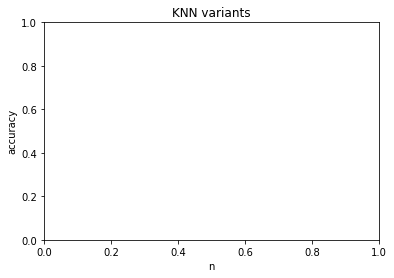

In [111]:
plt.figure()
multiple_line_chart(plt.gca(), nvalues, values, 'KNN variants', 'n', 'accuracy', percentage=True)
plt.show()